In [124]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn import tree
from sklearn.metrics import accuracy_score   
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import scipy.sparse
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import sys
np.set_printoptions(threshold=sys.maxsize)

In [125]:
dictSize = 225
X, y = load_svmlight_file( "train", multilabel = False, n_features = dictSize, offset = 1 )
X = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify = y)

In [ ]:
z = Counter(y_train)
z = dict(sorted(z.items(), key=lambda item: item[1]))
z

In [127]:
lst = list(z.keys())
print(lst)
lst = lst[:-4]
len(lst)

[27.0, 40.0, 6.0, 14.0, 31.0, 49.0, 46.0, 45.0, 18.0, 50.0, 47.0, 41.0, 39.0, 44.0, 43.0, 37.0, 48.0, 34.0, 42.0, 22.0, 29.0, 21.0, 17.0, 28.0, 32.0, 35.0, 24.0, 30.0, 26.0, 20.0, 19.0, 25.0, 23.0, 5.0, 15.0, 16.0, 13.0, 12.0, 11.0, 7.0, 8.0, 10.0, 9.0, 1.0, 4.0, 3.0, 2.0]


43

In [ ]:
# z1 = list()
# for key,value in z.items():
#   if value<100:
#     z1.append(value)
#   z1.append(item.key)
# z

In [128]:
X_train1=[]
X_train2=[]
y_train1 = []
y_train2 = []
for i in range(X_train.shape[0]):
  if(y_train[i] in lst):
    X_train1.append(X_train[i])
    y_train1.append(y_train[i])
  else:
    X_train2.append(X_train[i])
    y_train2.append(y_train[i])

In [ ]:
Counter(y_train1)

In [130]:
sampling = RandomOverSampler(random_state=42)
X_train1, y_train1 = sampling.fit_resample(X_train1, y_train1)

In [ ]:
Counter(y_train1)

In [132]:
X_train = X_train1 + X_train2
y_train = y_train1 + y_train2

In [ ]:
Counter(y_train)

In [134]:
# sampling2 = RandomOverSampler(random_state=42)
# X_train, y_train = sampling2.fit_resample(X_train, y_train)

In [135]:
# Counter(y_train)

In [ ]:
########### Decision tree ############
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=20, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)  
print(score)

0.7395


In [40]:
############ XGBoost #############
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)  
print(score)

0.6625


In [ ]:
########## KNN ############
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)  
print(score)

0.6405


In [ ]:
########## Random Forest ##########
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)  
print(score)

0.7535


In [ ]:
########## Ridge Classifier ##########
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

In [138]:
############## Logistic Regression ################
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                   intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',
                   max_iter=1000, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [139]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)  
print(score)

0.7685


In [140]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [141]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7685


In [ ]:
import numpy as np
from numpy import random as rand
import pickle

def findErrorClass( X, k ):
  n = X.shape[0]
	# Find out how many data points we have
  ld_model = pickle.load(open(filename, 'rb'))
  y_proba = ld_model.predict_proba(X)
  add3col = np.zeros(X.shape[0])
  y_proba = np.insert(y_proba,32,add3col, axis=1)
  y_proba = np.insert(y_proba,35,add3col, axis=1)
  y_proba = np.insert(y_proba,37,add3col, axis=1)
  y_pred = np.zeros((X.shape[0],k))
  for i in range(X.shape[0]):
    top5 = np.argsort(y_proba[i])[-k:][::-1]+1
    y_pred[i] = top5
  return y_pred

In [ ]:
import utils
import predict
import time as tm
import numpy as np

# This file is intended to demonstrate how we would evaluate your code
# The data loader needs to know how many feature dimensions are there
dictSize = 225
(X, y) = utils.loadData( "train", dictSize = dictSize )

# Get error class predictions from predict.py and time the thing
tic = tm.perf_counter()
yPred = findErrorClass( X_test, 5 )
toc = tm.perf_counter()

print( "Total time taken is %.6f seconds " % (toc - tic) )

preck = utils.getPrecAtK( y_test, yPred, 5 )
# The macro precision code takes a bit longer to execute due to the for loop over labels
mpreck = utils.getMPrecAtK( y_test, yPred, 5 )

# According to our definitions, both prec@k and mprec@k should go up as k goes up i.e. for your
# method, prec@i > prec@j if i > j and mprec@i > mprec@j if i > j. See the assignment description
# to convince yourself why this must be the case.

print( "prec@1: %0.3f" % preck[0], "prec@3: %0.3f" % preck[2], "prec@5: %0.3f" % preck[4] )
# Dont be surprised if mprec is small -- it is hard to do well on rare error classes
print( "mprec@1: %0.3f" % mpreck[0], "mprec@3: %0.3f" % mpreck[2], "mprec@5: %0.3f" % mpreck[4] )

Total time taken is 0.028970 seconds 
prec@1: 0.768 prec@3: 0.923 prec@5: 0.961
mprec@1: 0.646 mprec@3: 0.835 mprec@5: 0.904


In [ ]:
'''
Sampling with < 50
Total time taken is 0.035071 seconds 
prec@1: 0.794 prec@3: 0.928 prec@5: 0.965
mprec@1: 0.561 mprec@3: 0.802 mprec@5: 0.873
'''

In [ ]:
'''
Sampling with < 235
Total time taken is 0.074353 seconds 
prec@1: 0.768 prec@3: 0.923 prec@5: 0.961
mprec@1: 0.646 mprec@3: 0.835 mprec@5: 0.904
'''

In [ ]:
'''
Sampling with < 100
Total time taken is 0.028761 seconds 
prec@1: 0.786 prec@3: 0.926 prec@5: 0.963
mprec@1: 0.571 mprec@3: 0.815 mprec@5: 0.883
'''

In [ ]:
'''
With Sampling
### With random sampling over minority class
Total time taken is 0.027819 seconds 
prec@1: 0.678 prec@3: 0.903 prec@5: 0.949
mprec@1: 0.663 mprec@3: 0.835 mprec@5: 0.894
'''

In [ ]:
'''
Without Sampling
### With random sampling over minority class
Total time taken is 0.027819 seconds 
prec@1: 0.78 prec@3: 0.923 prec@5: 0.97
mprec@1: 0.553 mprec@3: 0.80 mprec@5: 0.85
'''

In [43]:
## create own accuracy function
def check_acc(X_test, k):
  y_proba = loaded_model.predict_proba(X_test)
  add3col = np.zeros(X_test.shape[0])
  y_proba = np.insert(y_proba,32,add3col, axis=1)
  y_proba = np.insert(y_proba,35,add3col, axis=1)
  y_proba = np.insert(y_proba,37,add3col, axis=1)
  y_pred = np.zeros((X_test.shape[0],k))
  for i in range(X_test.shape[0]):
    top5 = np.argsort(y_proba[i])[-k:][::-1]+1
    y_pred[i] = top5
  count = 0
  myCorrect = np.zeros(50)
  total = np.zeros(50)
  for i in range(X_test.shape[0]):
    if y_test[i] in y_pred[i]:
      temp = int(y_test[i])
      myCorrect[temp-1] +=1
      count+=1
    total[temp-1] += 1
  print("precision: ", count / X_test.shape[0])
  mac_pre = np.divide(myCorrect, total, out=np.zeros_like(myCorrect), where=total!=0)
  print("macro precision :", np.sum(mac_pre))
check_acc(X_test,5)

In [ ]:
pd.DataFrame(np.c_[y_test,y_pred]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   float64
 3   3       2000 non-null   float64
 4   4       2000 non-null   float64
 5   5       2000 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB


In [ ]:
pd.DataFrame(np.c_[y_test,y_pred]).describe()

,0,1,2,3,4,5
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.950500,6.333500,7.622500,10.858000,10.631000,13.382000
std,9.395328,8.567437,8.832497,10.359029,11.065716,11.523865
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,4.000000,3.000000,4.000000
50%,3.000000,3.000000,4.000000,8.000000,8.000000,10.000000
75%,8.000000,7.000000,12.000000,16.000000,15.000000,18.000000
max,50.000000,47.000000,47.000000,47.000000,47.000000,47.000000


In [ ]:
### Added duplicate rare error class 
X_added = []
y_added = []
for i in range(X_train.shape[0]):
  if y_train[i] > 10:
    X_added.append(X_train[i])
    y_added.append(y_train[i])
X_added = np.array(X_added)
y_added = np.array(y_added)
X_train = np.r_[X_train, X_added]
y_train = np.r_[y_train, y_added]

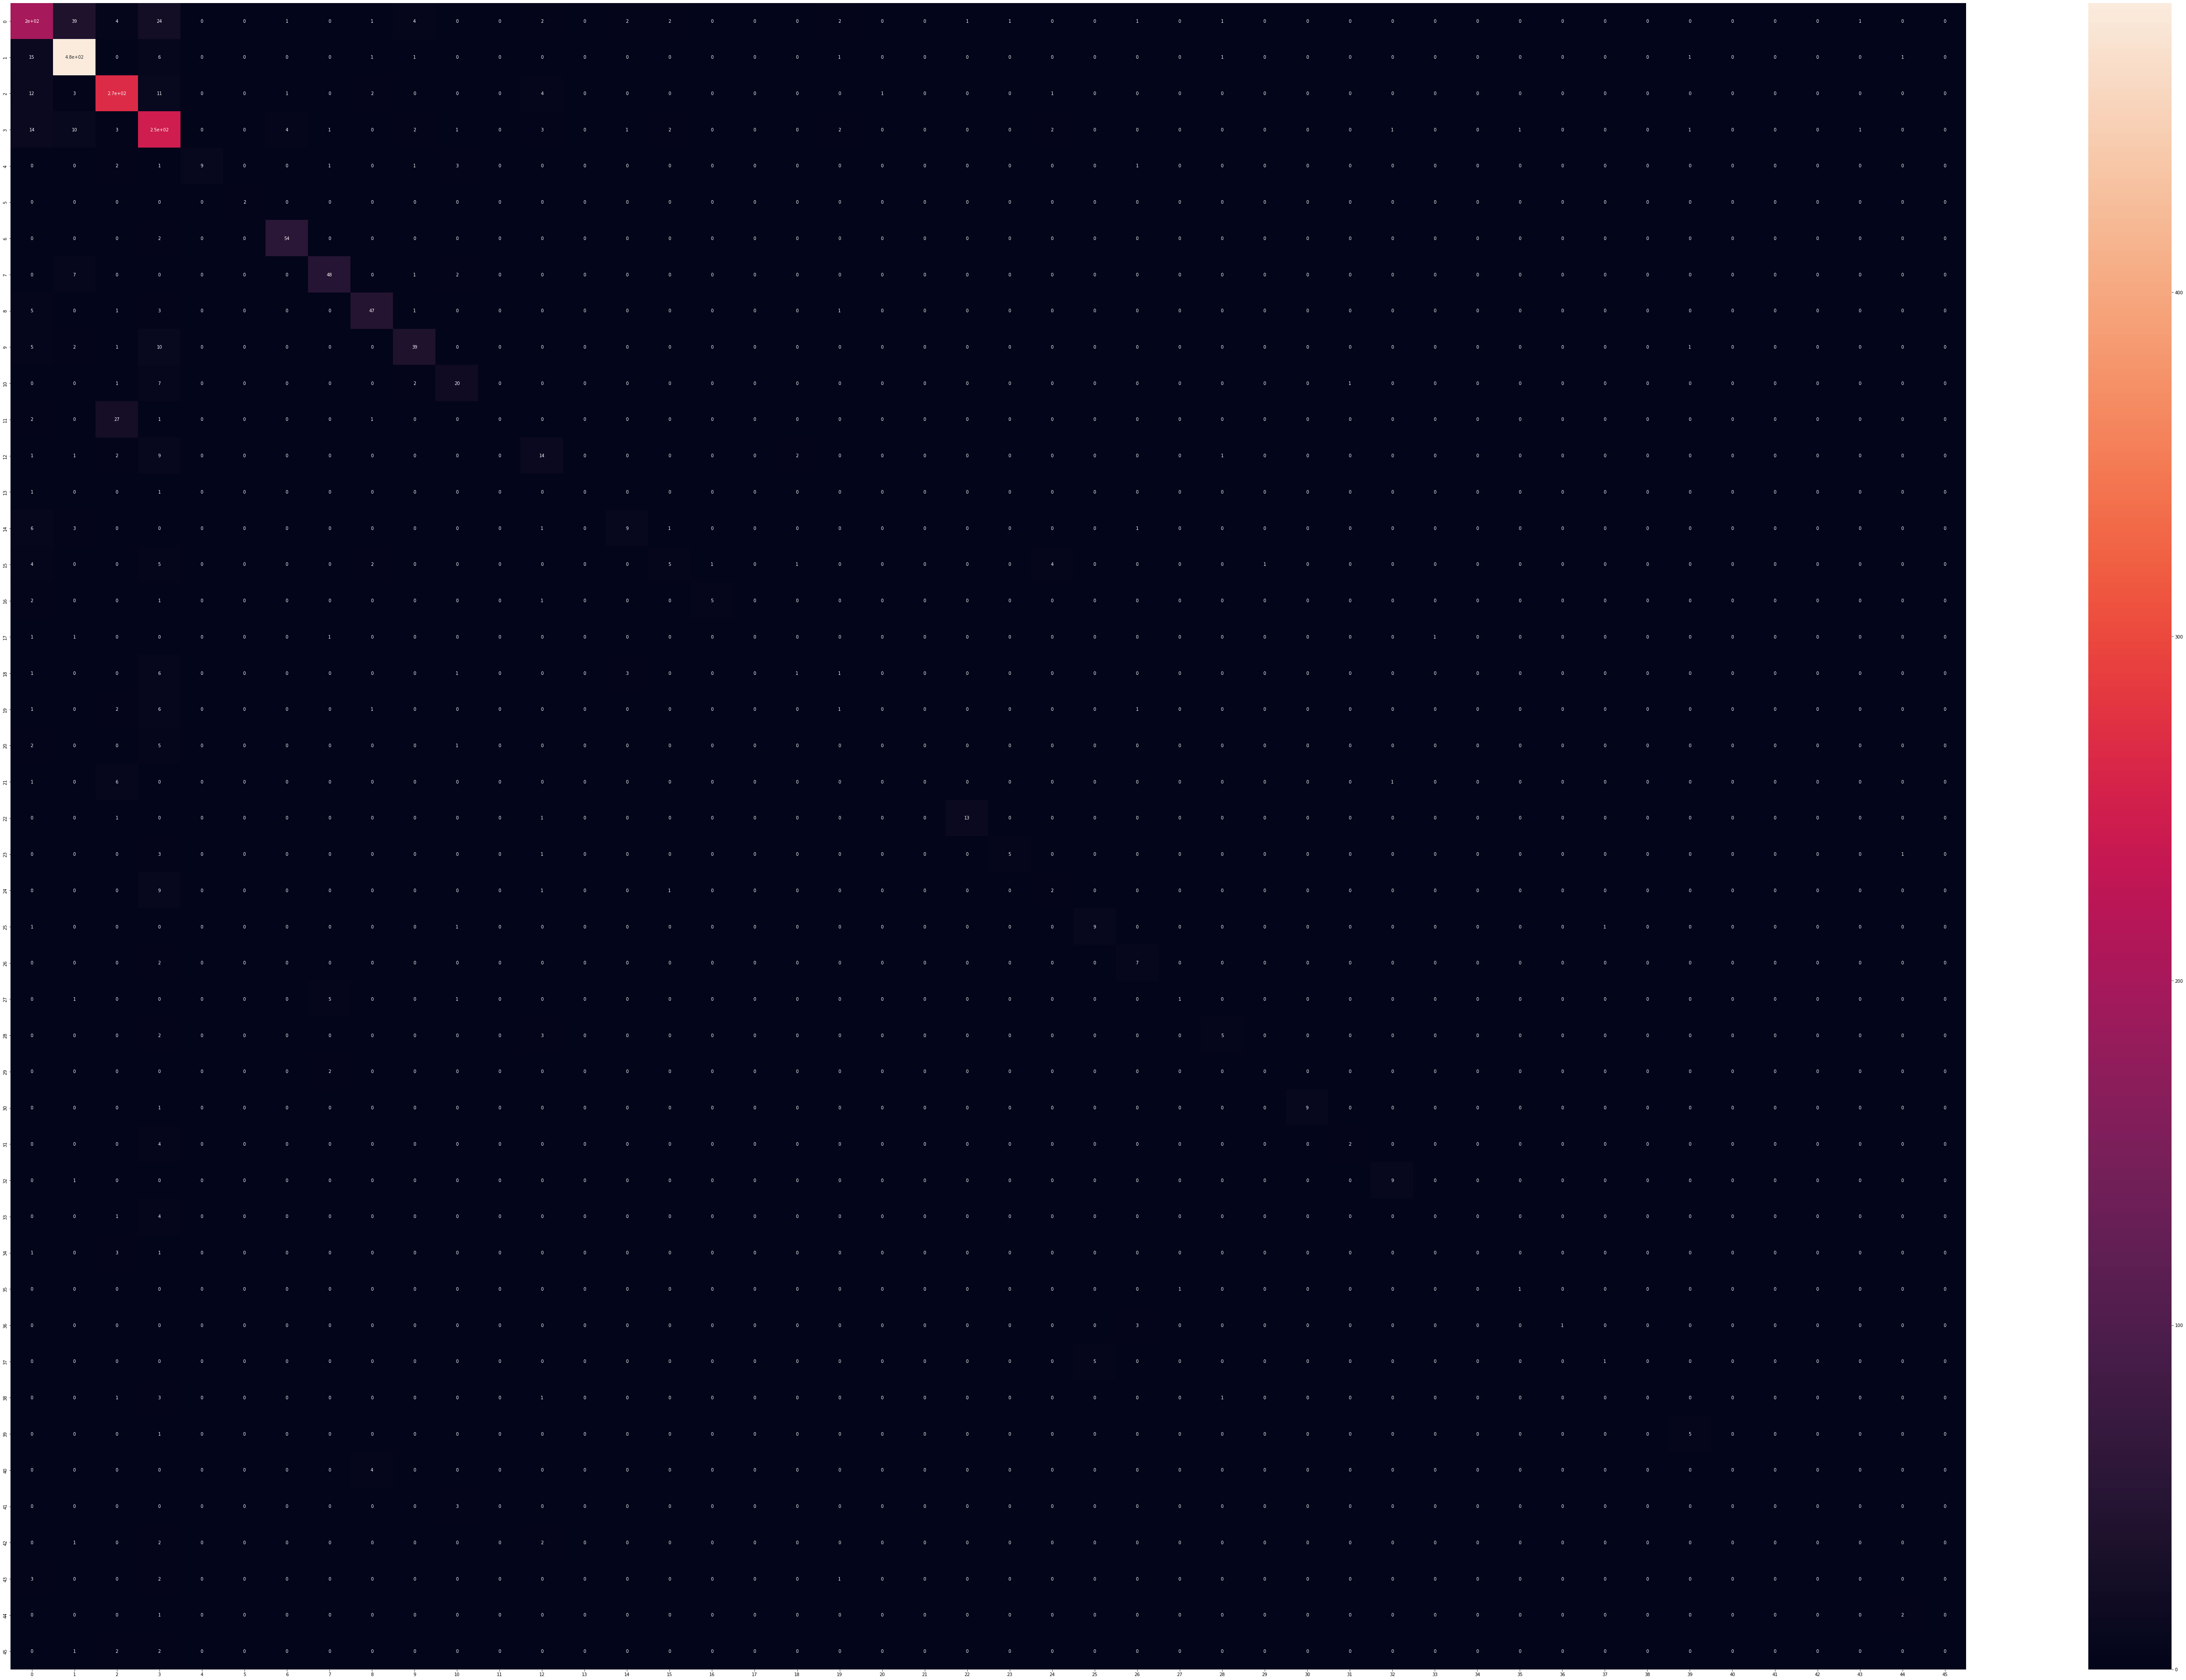

In [ ]:
### Plot confusion matrix
import seaborn as sn
import matplotlib.pyplot as plt
conMat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conMat, index = [i for i in range(conMat.shape[0])],
                  columns = [i for i in range(conMat.shape[0])])
plt.figure(figsize = (100,70))
sn.heatmap(df_cm, annot=True)

0.6515

In [ ]:
def myclf(myC, myitr):
  model = LogisticRegression(penalty='l2', dual=False, tol=0.1, C=myC, fit_intercept=True,
                   intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',
                   max_iter=myitr, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = accuracy_score(y_test, y_pred)  
  print(myC, myitr)
  print(score)
  print("-----------")

C_list = [10,20,50,100]
itr_list = [500, 1000, 2000, 5000]
for i in C_list:
  for j in itr_list:
    myclf(i,j)